In [1]:
#Import Libraries

**Get the Data**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

df = pd.read_csv('Titanictrain.csv')
dic = pd.read_excel('Titanic Data Dictionary.xlsx')
dic

1.19.2
1.1.3
0.11.0


,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


**Check Head**

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Check a few measures of descriptive statistics**

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Staneff, Mr. Ivan",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,1601,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


**Of all passengers in df, how many survived, how many died ?**

In [5]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Check the % of people who have survived.**

In [6]:
df.Survived.value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [8]:
df.Survived.value_counts(normalize=1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**Which Gender survived the crash more?**
**Male or Female?**

In [9]:
pd.crosstab(df.Sex,df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


**Visualize the above numbers**

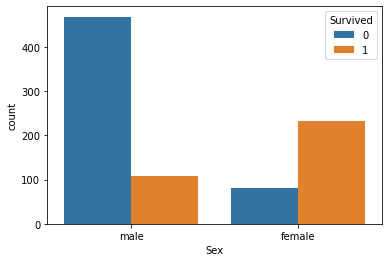

In [10]:
sns.countplot(x=df.Sex,hue=df.Survived);

**The percentage of men and women who survived the crash are?**

In [11]:
 df[df.Sex == 'female'].Survived.value_counts(1)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [12]:
 df[df.Sex == 'male'].Survived.value_counts(1)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

**Visualize the above % gender wise**

Make pie chart

**Plot a table of `Pclass` and `Survived` variable**

In [13]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Check the proportion of passengers who survived from different Ticket Classes**

In [54]:
pd.crosstab(df.Survived,df.Pclass,normalize=True).iloc[1]

Pclass
1    0.152637
2    0.097643
3    0.133558
Name: 1, dtype: float64

**Plot the fraction of passengers survived against their Ticket Class**

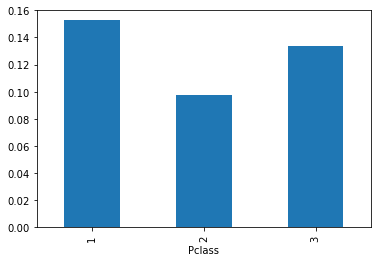

In [53]:
pd.crosstab(df.Survived,df.Pclass,normalize=True).iloc[1].plot(kind='bar');

The above graph has plotted the confidence interval.
Let us remove the confidence intervals and try to plot it once more.

**Plot a table of `Sex`,`Pclass` and `Survived` variable**

In [36]:
pd.crosstab([df.Sex,df.Pclass],df.Survived)#,aggfunc=len)

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

**Plot the proportion of people who survived the crash of the ship keeping the gender in mind**

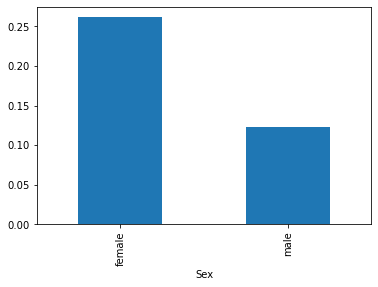

In [47]:
pd.crosstab(df.Survived,df.Sex,normalize=True).iloc[1].plot(kind='bar');
#df

**Make a countplot for `Survived` and `Embarked` variables**

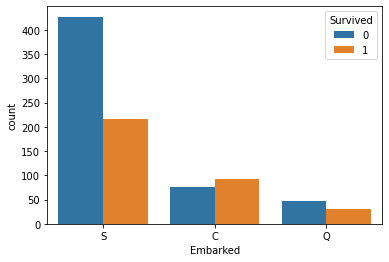

In [60]:
sns.countplot(hue=df.Survived,x=df.Embarked);

**Make a point plot for `Survived` and `Embarked` variables**

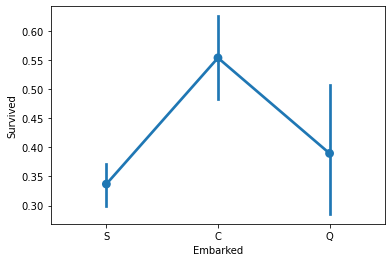

In [63]:
sns.pointplot(y=df.Survived,x=df.Embarked);

**Make a point plot for `Survived`,`Embarked` and `Sex` variables**

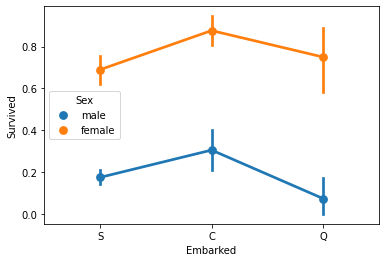

In [65]:
sns.pointplot(y=df.Survived,x=df.Embarked,hue=df.Sex);

**Make a point plot for `Survived`,`Embarked`,`Sex`, and `Pclass` variables**

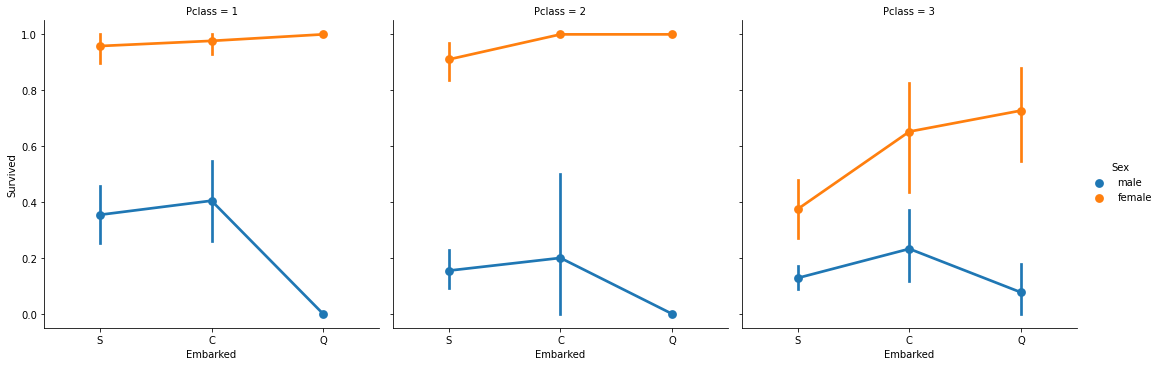

In [74]:
sns.catplot(kind='point',y='Survived',x='Embarked',hue='Sex',col='Pclass',data=df);

**Make a table of `Sex`,`Pclass`,`Embarked`,`Survived` variables**

In [75]:
pd.crosstab([df.Pclass,df.Embarked],[df.Sex,df.Survived])

Sex             female     male    
Survived             0   1    0   1
Pclass Embarked                    
1      C             1  42   25  17
       Q             0   1    1   0
       S             2  46   51  28
2      C             0   7    8   2
       Q             0   2    1   0
       S             6  61   82  15
3      C             8  15   33  10
       Q             9  24   36   3
       S            55  33  231  34

**Check the distribution of the fare**

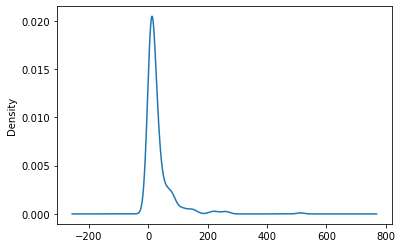

In [81]:
df['Fare'].plot(kind='density');

**Make the point plot of `Survived`,`Sex`, `Pclass`**

C:\Users\G2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


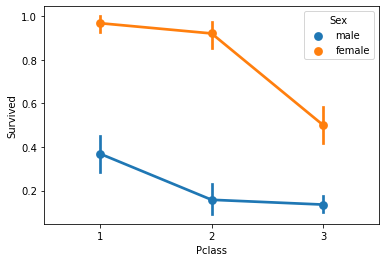

In [83]:
sns.pointplot(df.Pclass,df.Survived,hue=df.Sex);

**Plot the proportion of siblings / spouses aboard the Titanic who have survived.**

C:\Users\G2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

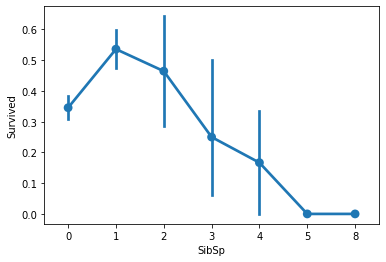

In [85]:
sns.pointplot(df.SibSp,df.Survived)

Let us check the correlation among various values.

**Make the 'heatmap' of Correlation**

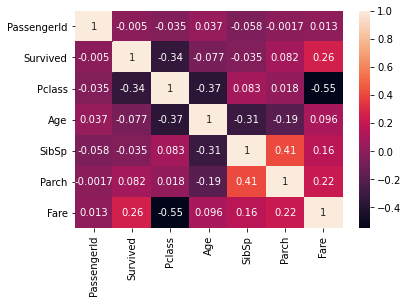

In [86]:
sns.heatmap(df.corr(),annot=True);

                                                Happy Learning